In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Read the input file
mall_df = pd.read_csv(r"E:\DS_ML_PYTHON\DS_ML\Module4_Machine_Learning\Un_Supervised_ML\Project_Mall\Mall_Customers.csv")

In [3]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Drop the CustomerID column, it is not required for analysis 
mall_df.drop('CustomerID', inplace=True, axis=1)

In [5]:
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
#Convert Gender column, String categorical to integer categorical
mall_df['Gender'] = mall_df['Gender'].astype('category')

In [8]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [9]:
#Make it Integer categorical
mall_df['Gender']= mall_df['Gender'].cat.codes

In [10]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int8 
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB


In [11]:
mall_df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [12]:
mall_df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#Get total number of rows and columns
mall_df.shape

(200, 4)

In [14]:
mall_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
#Using Salary and Spending score columns
#X = mall_df.drop(['CustomerID', 'Gender', 'Age'] , axis=1)
X= mall_df.iloc[:,[2,3]].values

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
#Scale the data to same format
from sklearn.preprocessing import normalize
scaled_data = normalize(X)

In [19]:
scaled_data

array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.93632918, 0.35112344],
       [0.20344646, 0.97908607],
       [0.39114064, 0.92033092],
       [0.21828984, 0.97588398],
       [0.9486833 , 0.31622777],
       [0.18807227, 0.98215519],
       [0.98776297, 0.15596257],
       [0.25515426, 0.96690036],
       [0.80505584, 0.59319904],
       [0.18847945, 0.98207713],
       [0.8       , 0.6       ],
       [0.25139836, 0.9678837 ],
       [0.83844362, 0.54498835],
       [0.24542187, 0.96941637],
       [0.51449576, 0.85749293],
       [0.30320366, 0.95292578],
       [0.62139471, 0.78349768],
       [0.22848559, 0.97354729],
       [0.56552836, 0.82472885],
       [0.31232107, 0.9499766 ],
       [0.98058068, 0.19611614],
       [0.32399297, 0.94605949],
       [0.89442719, 0.4472136 ],
       [0.32314385, 0.94634986],
       [0.65850461, 0.75257669],
       [0.41716766, 0.90882955],
       [0.68315713, 0.73027141],
       [0.31622777, 0.9486833 ],
       [0.

In [20]:
cols =['Annual Income (k$)',
       'Spending Score (1-100)']

In [21]:
scaled_data = pd.DataFrame(scaled_data, columns=cols)

In [22]:
scaled_data.head()

,Annual Income (k$),Spending Score (1-100)
0,0.358979,0.933346
1,0.182089,0.983282
2,0.936329,0.351123
3,0.203446,0.979086
4,0.391141,0.920331


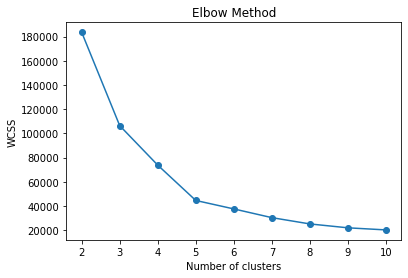

In [23]:
#Elbow Method
wcss=[]

for i in range(2,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    #k_means.fit(scaled_data)
    wcss.append(k_means.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow' 
plt.plot(range(2,11), wcss , marker = 'o')
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=5, init='random') # calling the model # 'k-means++'
#y_means = kmeans.fit_predict(scaled_data)
y_kmeans = kmeans.fit_predict(X)

In [25]:
y_kmeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

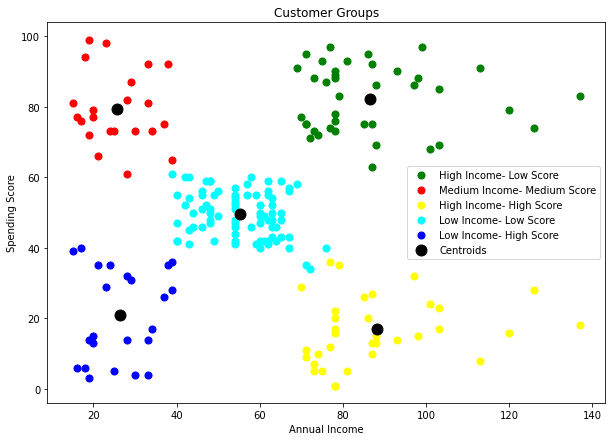

In [26]:
#Plotting the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans==0,0],  X[y_kmeans==0,1], s=50, c='green' , label='High Income- Low Score')
plt.scatter(X[y_kmeans==1,0] , X[y_kmeans==1,1], s=50, c='red' , label='Medium Income- Medium Score')
plt.scatter(X[y_kmeans==2,0] , X[y_kmeans==2,1], s=50, c='yellow' , label='High Income- High Score')
plt.scatter(X[y_kmeans==3,0] , X[y_kmeans==3,1], s=50, c='cyan' , label='Low Income- Low Score')
plt.scatter(X[y_kmeans==4,0] , X[y_kmeans==4,1], s=50, c='blue' , label='Low Income- High Score')

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=120, c='black' , label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [27]:
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [28]:
#Using Age and Spending Score Columns
X = mall_df.iloc[:,[1,3]].values


In [29]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [30]:
#Elbow Method
wcss=[]

for i in range(2,11):
    k_means =KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)    

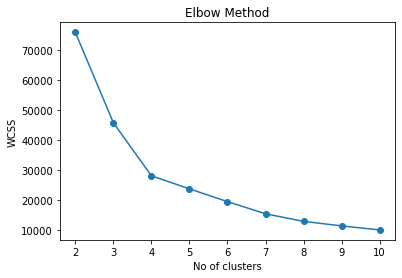

In [31]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow' 
plt.plot(range(2,11),wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=4 , init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [33]:
y_kmeans

array([0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 0, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

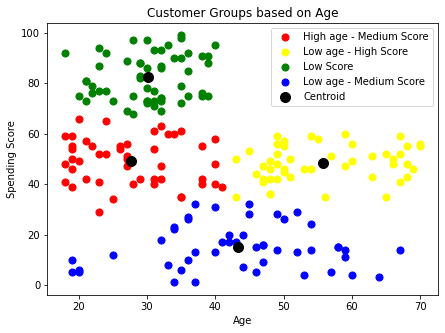

In [34]:
#Plotting the clusters
plt.figure(figsize=(7,5))
plt.scatter(X[y_kmeans == 0,0] ,X[y_kmeans == 0,1], s=50 , c='red', label='High age - Medium Score')
plt.scatter(X[y_kmeans == 1,0] ,X[y_kmeans == 1,1], s=50 , c='yellow', label='Low age - High Score')
plt.scatter(X[y_kmeans == 2,0] ,X[y_kmeans == 2,1], s=50 , c='green', label='Low Score')
plt.scatter(X[y_kmeans == 3,0] ,X[y_kmeans == 3,1], s=50 , c='blue', label='Low age - Medium Score')
#plt.scatter(X[y_kmeans == 4,0] ,X[y_kmeans == 4,1], s=50 , c='cyan', label='Cluster4')
#Plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')
           
plt.title('Customer Groups based on Age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [35]:
cluster_0 = X[y_kmeans == 0]

path ='C:\\Users\\Kishore kumar V\\OneDrive\\Desktop\\cluster_1.xlsx'
columnss=['Age','Spend']

df =pd.DataFrame(cluster_0,columns=columnss)

In [36]:
df.to_excel(path)

In [37]:
#Hierarchical Clustering

In [38]:
import scipy.cluster.hierarchy as sch

In [39]:
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [40]:
X = mall_df.iloc[:,[1,3]].values

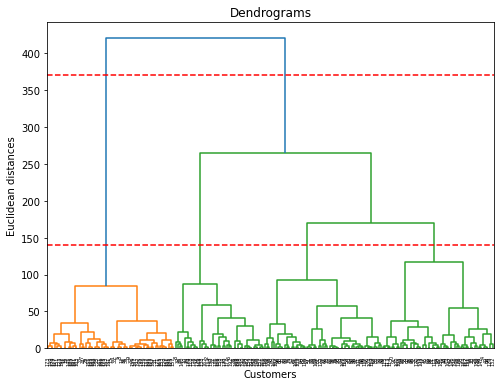

In [41]:
plt.figure(figsize=(8,6))
dend = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.axhline(y=370, color='r', linestyle='--')
plt.axhline(y=140, color='r' , linestyle='--')

In [42]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2)
grouped = cluster.fit_predict(X)

In [43]:
grouped

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

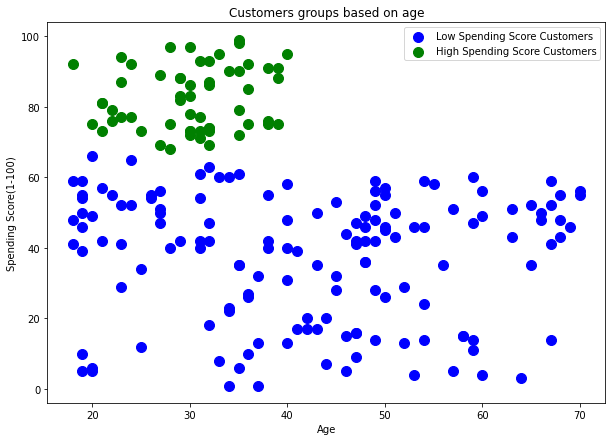

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(X[grouped == 0,0],X[grouped == 0,1] ,s=100, c='blue', label= 'Low Spending Score Customers')
plt.scatter(X[grouped == 1,0], X[grouped == 1,1],s=100, c='green', label= 'High Spending Score Customers')
# plt.scatter(X[grouped == 2,0], X[grouped == 2,1],s=50, c='yellow', label= 'Cluster2')
# plt.scatter(X[grouped == 3,0], X[grouped == 3,1],s=50, c='red', label= 'Cluster2')

plt.title('Customers groups based on age')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [45]:
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [46]:
#Annual Income and Spending Score
X= mall_df.iloc[:,[2,3]].values

In [47]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

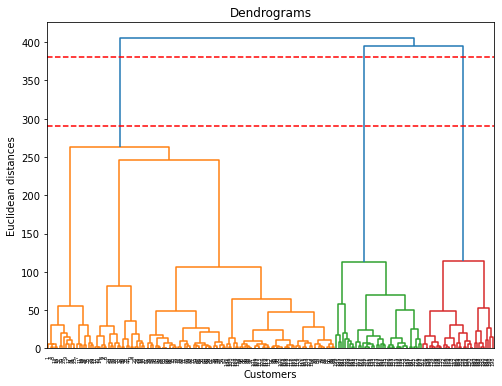

In [48]:
plt.figure(figsize=(8,6))
dend = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title("Dendrograms")
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.axhline(y=380, color='r', linestyle='--')
plt.axhline(y=290, color='r' , linestyle='--')

In [49]:
cluster= AgglomerativeClustering(n_clusters=3)
grouped = cluster.fit_predict(X)

In [50]:
grouped

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

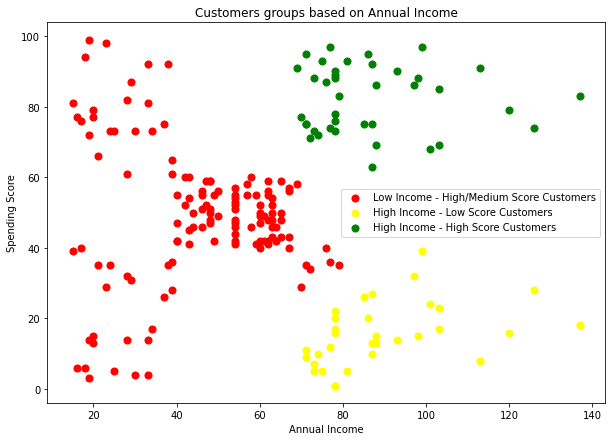

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(X[grouped == 0,0],X[grouped == 0,1] ,s=50, c='red', label= 'Low Income - High/Medium Score Customers')
plt.scatter(X[grouped == 1,0], X[grouped == 1,1],s=50, c='yellow', label= 'High Income - Low Score Customers')
plt.scatter(X[grouped == 2,0], X[grouped == 2,1],s=50, c='green', label= 'High Income - High Score Customers')


plt.title('Customers groups based on Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()